In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Importing data

In [69]:
df = pd.read_csv("consumption_temp.csv", parse_dates=['time'], dtype={'location': str})
# df = df[df['location'] != 'helsingfors']
df.head()

,time,location,consumption,temperature
0,2022-04-07 21:00:00,bergen,1.113325,-0.3
1,2022-04-07 21:00:00,oslo,4.092830,1.0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8


In [59]:
df.dtypes

time           datetime64[ns]
location               object
consumption           float64
temperature           float64
dtype: object

In [27]:
tmp = df.groupby(["location"]).describe()
tmp[("all", "count")] = tmp[("temperature", "count")].astype(int)
tmp = tmp.drop(
    columns=[("consumption", "count"), ("consumption", "25%"), ("consumption", "50%"), ("consumption", "75%"),
             ("temperature", "count"), ("temperature", "25%"), ("temperature", "50%"), ("temperature", "75%")]
)

tmp.to_latex("eda.tex", float_format="%.2f", bold_rows=True, na_rep="")

/var/folders/xd/z_ptq9v136q7kj9lf2f4sblh0000gn/T/ipykernel_4251/2978138630.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tmp.to_latex("eda.tex", float_format="%.2f", bold_rows=True, na_rep="")


## Analysis

### Trends

In [70]:
tmp = df.copy()
tmp["hour"] = tmp.time.dt.hour

tmp[(tmp.location == "oslo")].groupby("hour")["consumption"].mean()

hour
0     6.274924
1     6.114721
2     6.009268
3     5.979696
4     6.135811
5     6.543728
6     6.841302
7     6.816543
8     6.796929
9     6.783171
10    6.724341
11    6.647297
12    6.605318
13    6.695956
14    7.031094
15    7.468792
16    7.715978
17    7.827616
18    7.841608
19    7.782328
20    7.627261
21    7.326827
22    6.912046
23    6.530467
Name: consumption, dtype: float64

In [5]:
tmp.groupby("hour")["consumption"].mean().reset_index()

,hour,consumption
0,0,3.269502
1,1,3.202271
2,2,3.157208
3,3,3.143335
4,4,3.199516
5,5,3.356382
6,6,3.472220
7,7,3.469710
8,8,3.466168
9,9,3.463141


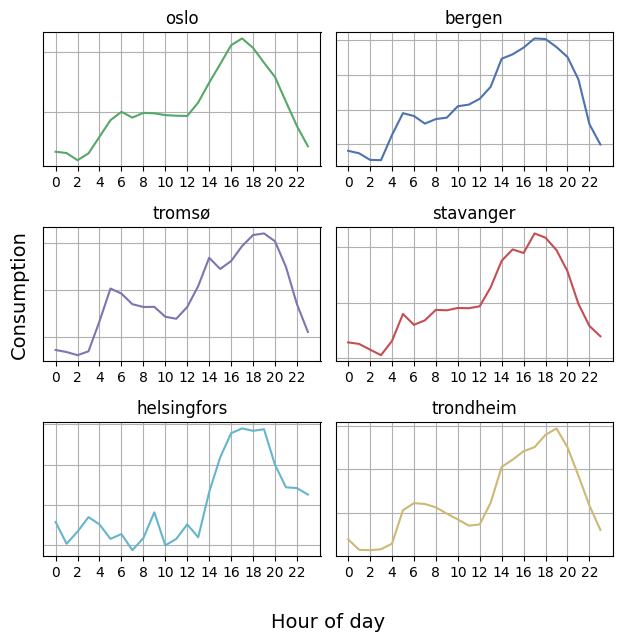

In [66]:
# Distribution plot of temperature per location

num_locations = df["location"].nunique()
fig, ax = plt.subplots(figsize=(6, 6), nrows=np.ceil(num_locations / 2).astype(int), ncols=2)


modern_plot_colors = [
    "#4C72B0",
    "#55A868",
    "#C44E52",
    "#8172B2",
    "#CCB974",
    "#64B5CD",
]

# ax[0].set_title("Distribution plot of temperature per location")

for i, location in enumerate(df["location"].unique()):
    y = (i + 1) % 2
    x = int((i - (i % 2)) / 2)

    tmp = df[(df.location == location)].copy()
    tmp["hour"] = tmp.time.dt.hour

    consumption = tmp.groupby("hour")["consumption"].median().reset_index()["consumption"]
    hour = tmp.groupby("hour")["consumption"].median().reset_index()["hour"]

    sns.lineplot(x=hour, y=consumption, ax=ax[x][y], color=modern_plot_colors[i])
    # ax[x][y].set_xlim(-20, 30)
    # ax[x][y].set_ylim(0, 650)
    ax[x][y].set_title(f"{location}")
    ax[x][y].set_xlabel(None)
    ax[x][y].set_ylabel(None)    
    ax[x][y].grid(True)
    # Remove y axis numbers

    ax[x][y].tick_params(axis="y", which="both", left=False, right=False, labelleft=False)
    # Set x ticks
    ax[x][y].set_xticks(np.arange(0, 24, 2))
    
# Set fig title
# fig.suptitle("Median consumption per hour of day per location", fontsize=16)

# Set fig x label
fig.text(0.5, -0.055, "Hour of day", ha="center", fontsize=14)

# Set fig y label
fig.text(-0.03, 0.5, "Consumption", va="center", rotation="vertical", fontsize=14)

fig.tight_layout()
plt.show()



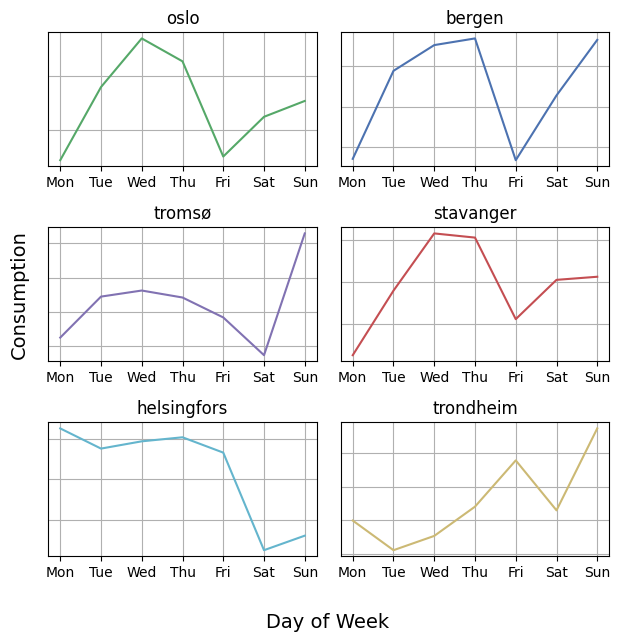

In [67]:
# Distribution plot of temperature per location

num_locations = df["location"].nunique()
fig, ax = plt.subplots(figsize=(6, 6), nrows=np.ceil(num_locations / 2).astype(int), ncols=2)


modern_plot_colors = [
    "#4C72B0",
    "#55A868",
    "#C44E52",
    "#8172B2",
    "#CCB974",
    "#64B5CD",
]

# ax[0].set_title("Distribution plot of temperature per location")

for i, location in enumerate(df["location"].unique()):
    y = (i + 1) % 2
    x = int((i - (i % 2)) / 2)

    tmp = df[(df.location == location)].copy()
    tmp["weekday"] = tmp.time.dt.weekday

    # COnvert weekday to string
    new_tmp = (
        tmp.groupby("weekday")["consumption"]
        .median()
        .reset_index()
        .sort_values(by="weekday")
    )
    new_tmp["weekday"] = np.where(
        new_tmp["weekday"] == 0,
        "Monday",
        np.where(
            new_tmp["weekday"] == 1,
            "Tuesday",
            np.where(
                new_tmp["weekday"] == 2,
                "Wednesday",
                np.where(
                    new_tmp["weekday"] == 3,
                    "Thursday",
                    np.where(
                        new_tmp["weekday"] == 4,
                        "Friday",
                        np.where(
                            new_tmp["weekday"] == 5,
                            "Saturday",
                            np.where(
                                new_tmp["weekday"] == 6, "Sunday", "aawdwd"
                            ),
                        ),
                    ),
                ),
            ),
        ),
    )
    new_tmp["weekday"] = new_tmp["weekday"].str[:3]

    consumption = new_tmp["consumption"]
    weekday = new_tmp["weekday"]

    sns.lineplot(x=weekday, y=consumption, ax=ax[x][y], color=modern_plot_colors[i])
    # sns.lineplot(x=weekday, y=temperature, ax=ax[x][y], color=modern_plot_colors[i])
    # ax[x][y].set_xlim(-20, 30)
    # ax[x][y].set_ylim(0, 650)
    ax[x][y].set_title(f"{location}")
    ax[x][y].set_xlabel(None)
    ax[x][y].set_ylabel(None)
    ax[x][y].grid(True)
    # Remove y axis numbers

    ax[x][y].tick_params(
        axis="y", which="both", left=False, right=False, labelleft=False
    )
    # Set x ticks
    # ax[x][y].set_xticks(np.arange(0, 7, 2))

# Set fig title
# fig.suptitle("Median consumption per day of week per location", fontsize=16)

# Set fig x label
fig.text(0.5, -0.055, "Day of Week", ha="center", fontsize=14)

# Set fig y label
fig.text(-0.03, 0.5, "Consumption", va="center", rotation="vertical", fontsize=14)

fig.tight_layout()
plt.show()

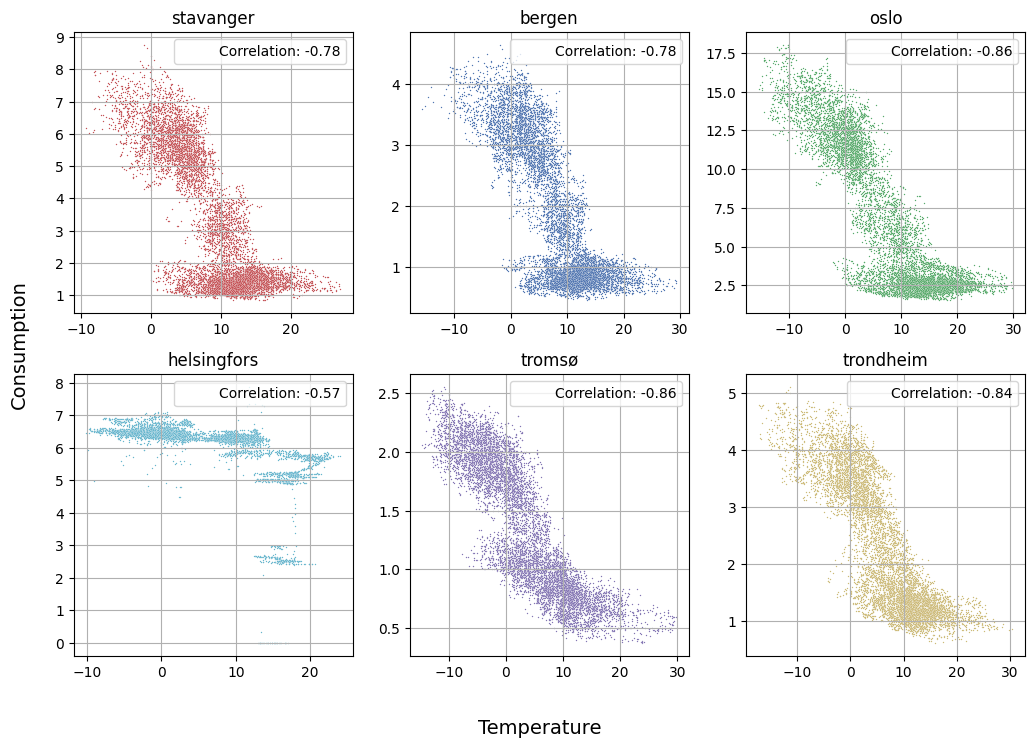

In [53]:
# Distribution plot of temperature per location

num_locations = df["location"].nunique()
fig, ax = plt.subplots(
    figsize=(10, 7), nrows=np.ceil(num_locations / 3).astype(int), ncols=3
)


modern_plot_colors = [
    "#4C72B0",
    "#55A868",
    "#C44E52",
    "#8172B2",
    "#CCB974",
    "#64B5CD",
]

# ax[0].set_title("Distribution plot of temperature per location")

for i, location in enumerate(df["location"].unique()):
    y = (i + 1) % 3
    x = int((i - (i % 3)) / 3)

    tmp = df[(df.location == location)].copy()

    sns.scatterplot(x=tmp["temperature"], y=tmp["consumption"], ax=ax[x][y], color=modern_plot_colors[i], s=1)
    # sns.lineplot(x=weekday, y=temperature, ax=ax[x][y], color=modern_plot_colors[i])
    # ax[x][y].set_xlim(-20, 30)
    # ax[x][y].set_ylim(0, 650)
    ax[x][y].set_title(f"{location}")
    ax[x][y].set_xlabel(None)
    ax[x][y].set_ylabel(None)    
    ax[x][y].grid(True)

    # Add legend with correlation metric
    corr = tmp["temperature"].corr(tmp["consumption"])
    ax[x][y].legend([f"Correlation: {corr:.2f}"], loc="upper right", markerscale=0, frameon=True)

    # Remove y axis numbers

    # ax[x][y].tick_params(axis="y", which="both", left=False, right=False, labelleft=False)
    # Set x ticks
    # ax[x][y].set_xticks(np.arange(0, 7, 2))

# Set fig title
# fig.suptitle("Median consumption per day of week per location", fontsize=16)

# Set fig x label
fig.text(0.5, -0.055, "Temperature", ha="center", fontsize=14)

# Set fig y label
fig.text(-0.03, 0.5, "Consumption", va="center", rotation="vertical", fontsize=14)

fig.tight_layout()
plt.show()

### Autogluon Overview

In [11]:
train, val = train_test_split(df, test_size=0.1, random_state=42)

In [18]:
val.dtypes

time           datetime64[ns]
location               object
consumption           float64
temperature           float64
dtype: object

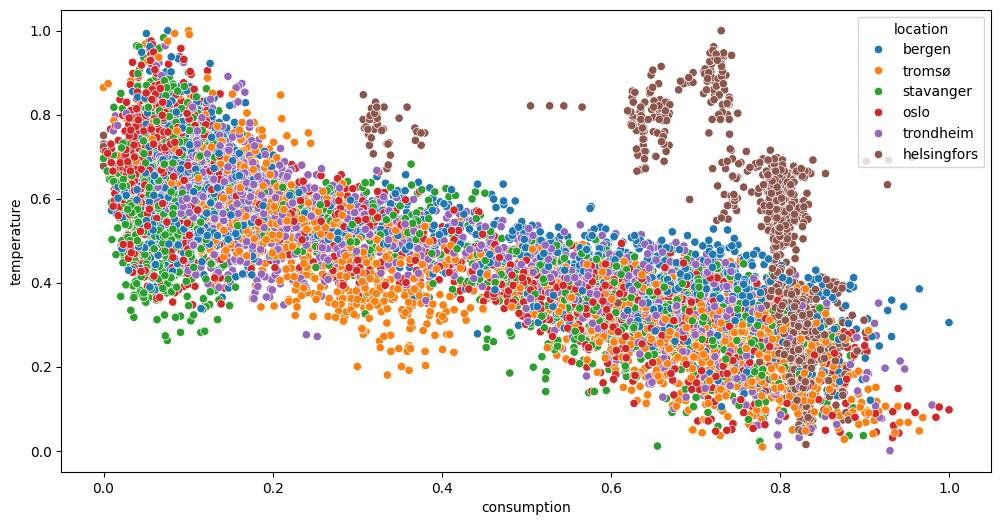

In [22]:
import autogluon.eda.auto as auto

plot_data = df.copy()
plot_data = plot_data.drop(columns=["time"])
scaler = MinMaxScaler()

# minmax scale per location

for location in plot_data["location"].unique():
    tmp = plot_data[plot_data["location"] == location].copy()
    tmp["consumption"] = scaler.fit_transform(tmp["consumption"].values.reshape(-1, 1))
    tmp["temperature"] = scaler.fit_transform(tmp["temperature"].values.reshape(-1, 1))
    plot_data[plot_data["location"] == location] = tmp
plot_data
# plot_data["location"] = df["location"]
# plt.figure(figsize=(10, 10))
auto.analyze_interaction(train_data=plot_data, x="consumption", y="temperature", hue="location")

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
consumption,10000,3.497842,3.073038,0.0,1.262036,2.399511,5.188,18.025397,float64,9431,,,float,


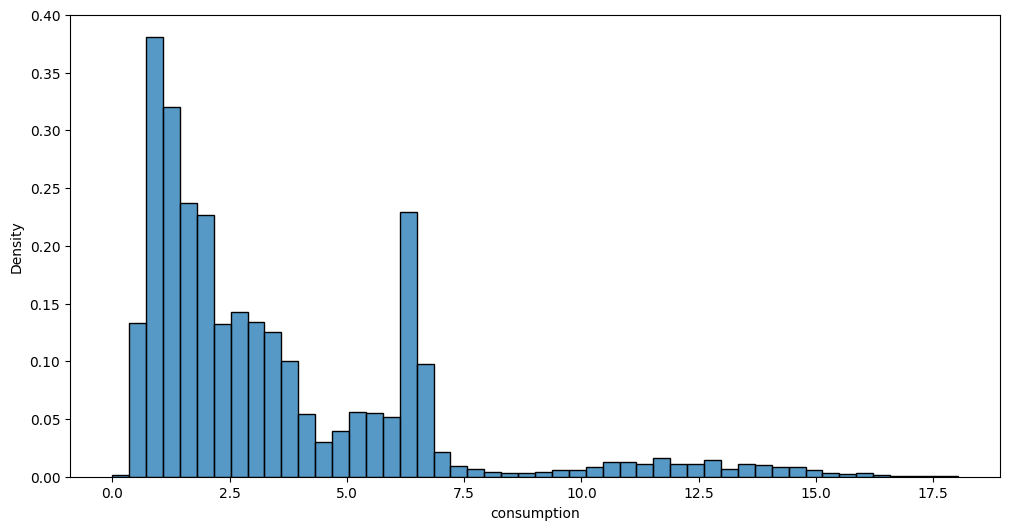

### Distribution fits for target variable
 - ⚠️ none of the [attempted](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions) distribution fits satisfy specified minimum p-value threshold: `0.01`

### Target variable correlations
 - ⚠️ no fields with absolute correlation greater than `0.5` found for target variable `consumption`.

In [22]:
import autogluon.eda.auto as auto

auto.target_analysis(train_data=train, label="consumption")



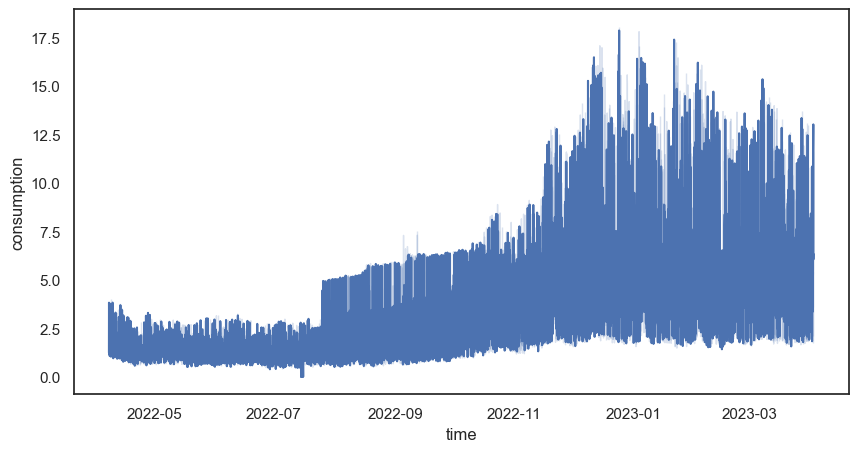

In [67]:
import autogluon.eda.auto as auto

auto.analyze_interaction(train_data=df, x='time', y='consumption', fig_args={'figsize': (10, 5)})


No path specified. Models will be saved in: "AutogluonModels/ag-20231105_164044/"


### Partial Dependence Plots

Individual Conditional Expectation (ICE) plots complement Partial Dependence Plots (PDP) by showing the relationship between a feature and the model's output for each individual instance in the dataset. ICE lines (blue) can be overlaid on PDPs (red) to provide a more detailed view of how the model behaves for specific instances. Here are some points on how to interpret PDPs with ICE lines:

* **Central tendency**: The PDP line represents the average prediction for different values of the feature of interest. Look for the overall trend of the PDP line to understand the average effect of the feature on the model's output.
* **Variability**: The ICE lines represent the predicted outcomes for individual instances as the feature of interest changes. Examine the spread of ICE lines around the PDP line to understand the variability in predictions for different instances.
* **Non-linear relationships**: Look for any non-linear patterns in the PDP and ICE lines. This may indicate that the model captures a non-linear relationship between the feature and the model's output.
* **Heterogeneity**: Check for instances where ICE lines have widely varying slopes, indicating different relationships between the feature and the model's output for individual instances. This may suggest interactions between the feature of interest and other features.
* **Outliers**: Look for any ICE lines that are very different from the majority of the lines. This may indicate potential outliers or instances that have unique relationships with the feature of interest.
* **Confidence** intervals: If available, examine the confidence intervals around the PDP line. Wider intervals may indicate a less certain relationship between the feature and the model's output, while narrower intervals suggest a more robust relationship.
* **Interactions**: By comparing PDPs and ICE plots for different features, you may detect potential interactions between features. If the ICE lines change significantly when comparing two features, this might suggest an interaction effect.

<sub><sup>Use `show_help_text=False` to hide this information when calling this function.</sup></sub>

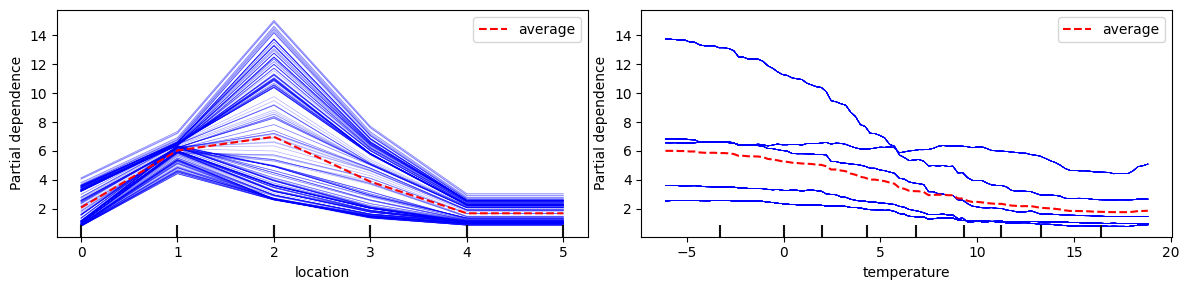

The following variable(s) are categorical: `location`. They are represented as the numbers in the figures above. Mappings are available in `state.pdp_id_to_category_mappings`. The`state` can be returned from this call via adding `return_state=True`.

In [49]:
state = auto.partial_dependence_plots(df, label='consumption', return_state=True)

### Descriptive statistics and Distribution

In [5]:
# Temperature description
print("Temperature description")
display(df[["temperature", "location"]].groupby("location").describe().round(2))

# Consumption description
print("Consumption description")
display(df[["consumption", "location"]].groupby("location").describe().round(2))

Temperature description


temperature                                        
                  count  mean   std   min  25%  50%   75%   max
location                                                       
bergen           8641.0  7.75  6.56 -15.6  3.1  8.1  12.2  29.3
helsingfors      6289.0  5.66  7.59 -10.1 -0.3  3.1  11.6  24.0
oslo             8641.0  7.39  8.77 -15.4  0.9  7.9  14.2  29.8
stavanger        8641.0  8.55  5.84  -9.2  4.3  8.9  12.7  27.0
tromsø           8641.0  3.51  7.97 -14.6 -2.6  2.8   9.6  29.8
trondheim        8641.0  6.21  7.62 -17.3  1.1  6.5  11.6  30.5

Consumption description


consumption                                            
                  count  mean   std   min   25%   50%    75%    max
location                                                           
bergen           8641.0  1.88  1.16  0.44  0.83  1.38   3.00   4.65
helsingfors      6289.0  6.08  0.92  0.00  6.19  6.35   6.47   7.86
oslo             8641.0  6.88  4.67  1.52  2.61  4.87  11.46  18.05
stavanger        8641.0  3.30  2.11  0.83  1.38  2.39   5.40   8.76
tromsø           8641.0  1.34  0.56  0.37  0.83  1.20   1.87   2.55
trondheim        8641.0  2.28  1.14  0.62  1.26  1.84   3.38   5.10

Text(80.375, 0.5, 'Temperature')

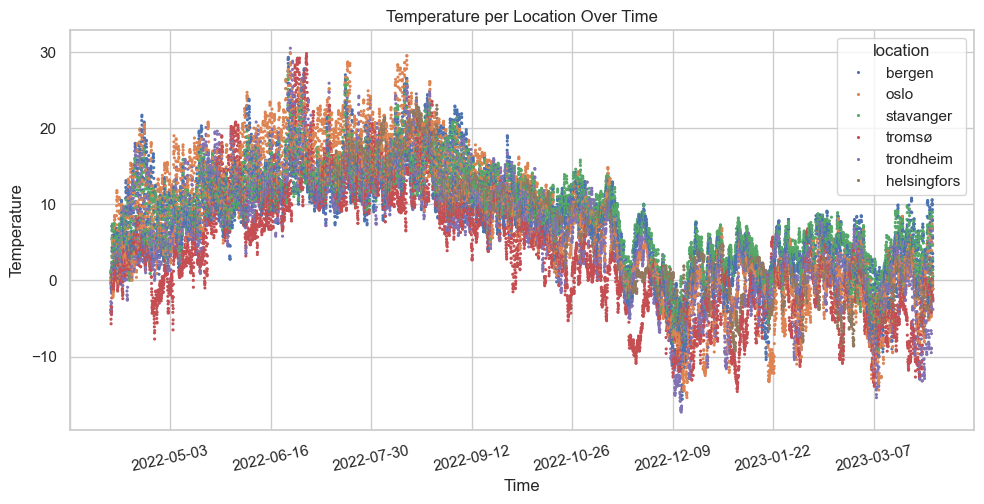

In [6]:
from matplotlib import ticker


def draw(data:pd.DataFrame, x:str, y:str, hue:str):
    sns.set_theme(style="whitegrid")
    plot = sns.scatterplot(x=x, y=y, hue=hue, data=data, s=5, linewidth=0)
    new_xticklabels = [item.get_text()[:10] for item in plot.get_xticklabels()]
    plot.set_xticks(plot.get_xticks())
    plot.set_xticklabels(new_xticklabels)
    plot.xaxis.set_major_locator(ticker.LinearLocator(10))
    plt.xticks(rotation=12)
    plt.tight_layout()

data_consumption = df.drop(columns=["temperature"])
data_temp = df.drop(columns=["consumption"])
plt.figure(figsize=(10, 5))
# draw(df, "time", "consumption", "location")
draw(df, "time", "temperature", "location")
plt.title("Temperature per Location Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature")

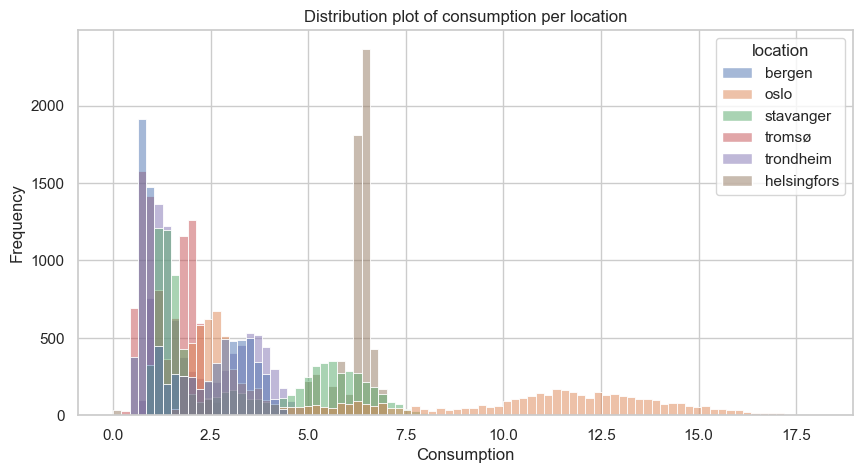

In [54]:
# Distribution plot of consumption per location

fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(data=df, x="consumption", hue="location", ax=ax)

ax.set_title("Distribution plot of consumption per location")
ax.set_xlabel("Consumption")
ax.set_ylabel("Frequency")

plt.show()


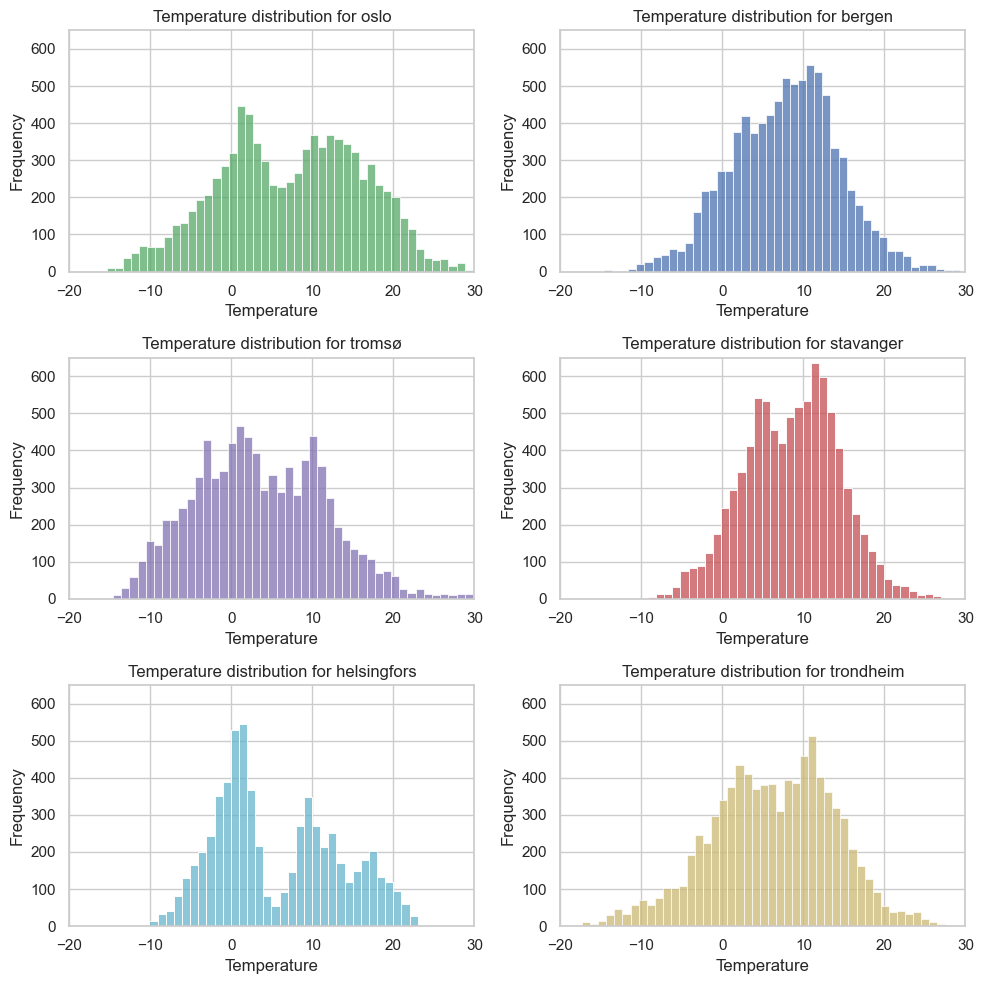

In [68]:
# Distribution plot of temperature per location

num_locations = df["location"].nunique()
fig, ax = plt.subplots(figsize=(10, 10), nrows=np.ceil(num_locations / 2).astype(int), ncols=2)


modern_plot_colors = [
    "#4C72B0",
    "#55A868",
    "#C44E52",
    "#8172B2",
    "#CCB974",
    "#64B5CD",
]

# ax[0].set_title("Distribution plot of temperature per location")

for i, location in enumerate(df["location"].unique()):
    y = (i + 1) % 2
    x = int((i - (i % 2)) / 2)

    sns.histplot(data=df[df.location == location], x="temperature", binwidth=1, ax=ax[x][y], color=modern_plot_colors[i])
    ax[x][y].set_xlim(-20, 30)
    ax[x][y].set_ylim(0, 650)
    ax[x][y].set_title(f"Temperature distribution for {location}")
    ax[x][y].set_xlabel("Temperature")
    ax[x][y].set_ylabel("Frequency")    



fig.tight_layout()
plt.show()


In [69]:
# Correlation between consumption and temperature per location

df.groupby("location")[["consumption", "temperature"]].corr()

consumption  temperature
location                                         
bergen      consumption     1.000000    -0.781353
            temperature    -0.781353     1.000000
helsingfors consumption     1.000000    -0.567863
            temperature    -0.567863     1.000000
oslo        consumption     1.000000    -0.861854
            temperature    -0.861854     1.000000
stavanger   consumption     1.000000    -0.781747
            temperature    -0.781747     1.000000
tromsø      consumption     1.000000    -0.863436
            temperature    -0.863436     1.000000
trondheim   consumption     1.000000    -0.837779
            temperature    -0.837779     1.000000

Helsingfors has lowest correlation

### Data Quality

In [8]:
# Find missing values

print("Missing values")
display(df.isna().sum())

Missing values


time           0
location       0
consumption    0
temperature    0
dtype: int64

In [9]:
# Find duplicates

print("Duplicates")
display(df.duplicated().sum())

Duplicates


0

/var/folders/xd/z_ptq9v136q7kj9lf2f4sblh0000gn/T/ipykernel_4251/2165010759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="location", y="consumption", ax=ax, palette="Set2")


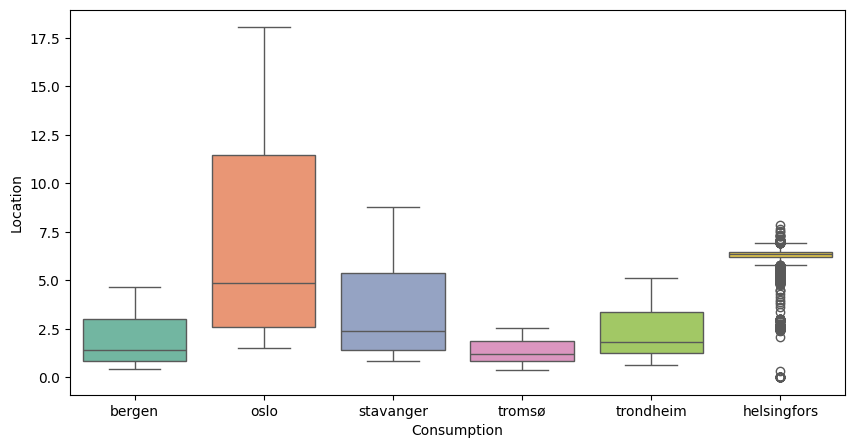

/var/folders/xd/z_ptq9v136q7kj9lf2f4sblh0000gn/T/ipykernel_4251/2165010759.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="location", y="temperature", ax=ax, palette="Set2")


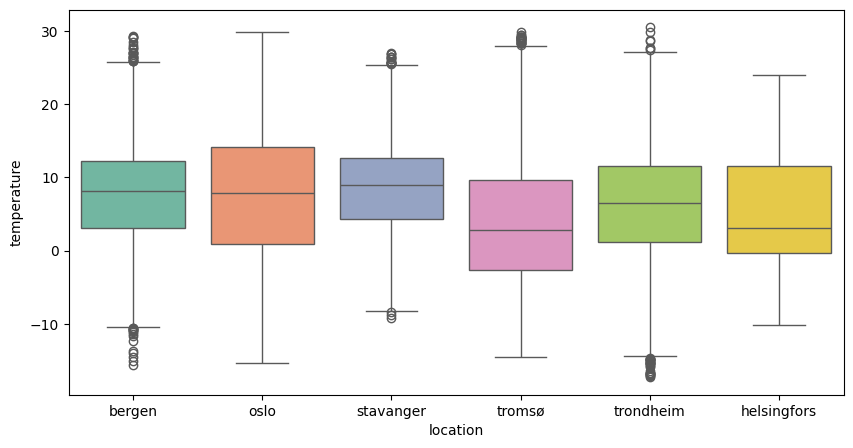

In [35]:
# Find outliers of consumption

fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df, x="location", y="consumption", ax=ax, palette="Set2")

# ax.set_title("Boxplot of consumption per location")
ax.set_xlabel("Consumption")
ax.set_ylabel("Location")

plt.show()

# Find outliers of temperature

fig, ax = plt.subplots(figsize=(10, 5))

sns.boxplot(data=df, x="location", y="temperature", ax=ax, palette="Set2")

# ax.set_title("Boxplot of temperature per location")

plt.show()

## Feature engineering

### Time Features

In [11]:
clean = df.copy()

In [12]:
# Add time features to dataset

df["time"] = pd.to_datetime(df["time"])
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df["day"] = df["time"].dt.day
df["hour"] = df["time"].dt.hour
df["weekday"] = df["time"].dt.weekday
df["weekend"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0)

df

,time,location,consumption,temperature,year,month,day,hour,weekday,weekend
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,2022,4,7,21,3,0
1,2022-04-07 21:00:00,oslo,4.092830,1.0,2022,4,7,21,3,0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,2022,4,7,21,3,0
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,2022,4,7,21,3,0
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,2022,4,7,21,3,0
...,...,...,...,...,...,...,...,...,...,...
49488,2023-04-02 21:00:00,bergen,3.126721,1.8,2023,4,2,21,6,1
49490,2023-04-02 21:00:00,oslo,12.134655,-1.1,2023,4,2,21,6,1
49491,2023-04-02 21:00:00,stavanger,5.622820,0.5,2023,4,2,21,6,1
49492,2023-04-02 21:00:00,tromsø,2.018333,-2.5,2023,4,2,21,6,1


### Location engineering

In [13]:
# One hot encode location

locations = df["location"].unique()
df[locations] = pd.get_dummies(df["location"]).astype(int)

df

,time,location,consumption,temperature,year,month,day,hour,weekday,weekend,bergen,oslo,stavanger,tromsø,trondheim
0,2022-04-07 21:00:00,bergen,1.113325,-0.3,2022,4,7,21,3,0,1,0,0,0,0
1,2022-04-07 21:00:00,oslo,4.092830,1.0,2022,4,7,21,3,0,0,1,0,0,0
2,2022-04-07 21:00:00,stavanger,2.057858,1.3,2022,4,7,21,3,0,0,0,1,0,0
3,2022-04-07 21:00:00,tromsø,1.246582,-3.9,2022,4,7,21,3,0,0,0,0,1,0
4,2022-04-07 21:00:00,trondheim,1.970098,-2.8,2022,4,7,21,3,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49488,2023-04-02 21:00:00,bergen,3.126721,1.8,2023,4,2,21,6,1,1,0,0,0,0
49490,2023-04-02 21:00:00,oslo,12.134655,-1.1,2023,4,2,21,6,1,0,1,0,0,0
49491,2023-04-02 21:00:00,stavanger,5.622820,0.5,2023,4,2,21,6,1,0,0,1,0,0
49492,2023-04-02 21:00:00,tromsø,2.018333,-2.5,2023,4,2,21,6,1,0,0,0,1,0


### Holiday engineering

In [14]:
# Add holiday flag

# Import holidays data
with open('helligdager2022.json') as data_file:    
    holidays_2022 = json.load(data_file)

with open('helligdager2023.json') as data_file:    
    holidays_2023 = json.load(data_file)  

holidays_2022 = pd.json_normalize(holidays_2022, 'data')
holidays_2023 = pd.json_normalize(holidays_2023, 'data')

holidays_2023["time"] = pd.to_datetime(holidays_2023["date"])
holidays_2022["time"] = pd.to_datetime(holidays_2022["date"])

# Merge into df
data = df.copy()

data["is_holiday"] = np.logical_or(
    np.isin(
        pd.to_datetime(data["time"]).dt.date, pd.to_datetime(holidays_2022["time"]).dt.date
    ),
    np.isin(
        pd.to_datetime(data["time"]).dt.date, pd.to_datetime(holidays_2023["time"]).dt.date
    ),
).astype(int)

df["is_holiday"] = data["is_holiday"]

### Drop things

In [15]:
# Drop location column
df = df.drop(columns=["location", "time"], errors="ignore")

### Feature scaling

In [16]:
# Scale features

scaler = MinMaxScaler()

df[df.columns] = scaler.fit_transform(df[df.columns])

df

,consumption,temperature,year,month,day,hour,weekday,weekend,bergen,oslo,stavanger,tromsø,trondheim,is_holiday
0,0.041912,0.355649,0.0,0.272727,0.200000,0.913043,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.210509,0.382845,0.0,0.272727,0.200000,0.913043,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.095359,0.389121,0.0,0.272727,0.200000,0.913043,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.049453,0.280335,0.0,0.272727,0.200000,0.913043,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.090393,0.303347,0.0,0.272727,0.200000,0.913043,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49488,0.155841,0.399582,1.0,0.272727,0.033333,0.913043,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
49490,0.665560,0.338912,1.0,0.272727,0.033333,0.913043,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
49491,0.297084,0.372385,1.0,0.272727,0.033333,0.913043,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
49492,0.093123,0.309623,1.0,0.272727,0.033333,0.913043,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### Correlation Analysis

/var/folders/xd/z_ptq9v136q7kj9lf2f4sblh0000gn/T/ipykernel_12287/758341856.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


Text(0, 0.5, 'Holiday')

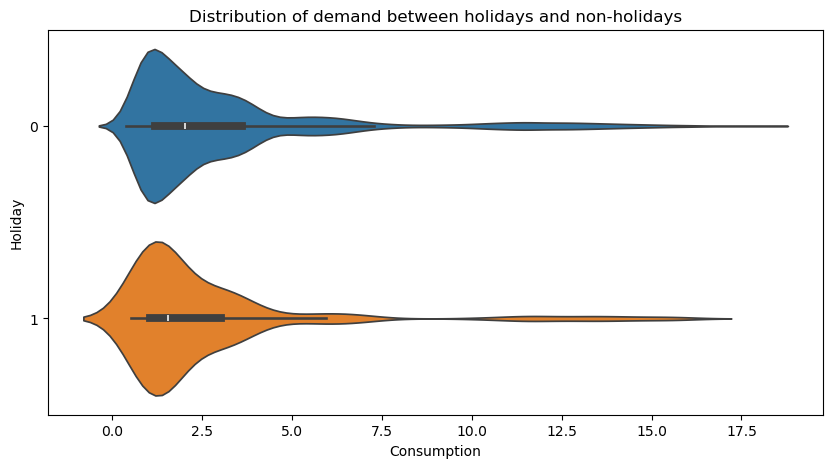

In [17]:
plot_data = data.copy()
# plot_data = plot_data[plot_data.location.isin(["trondheim"])]

fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(
    x="consumption",
    y="is_holiday",
    data=plot_data.assign(is_holiday=plot_data.is_holiday.astype(str)),
    palette="tab10",
    ax=ax,
)
ax.set_title("Distribution of demand between holidays and non-holidays")
ax.set_xlabel("Consumption")
ax.set_ylabel("Holiday")

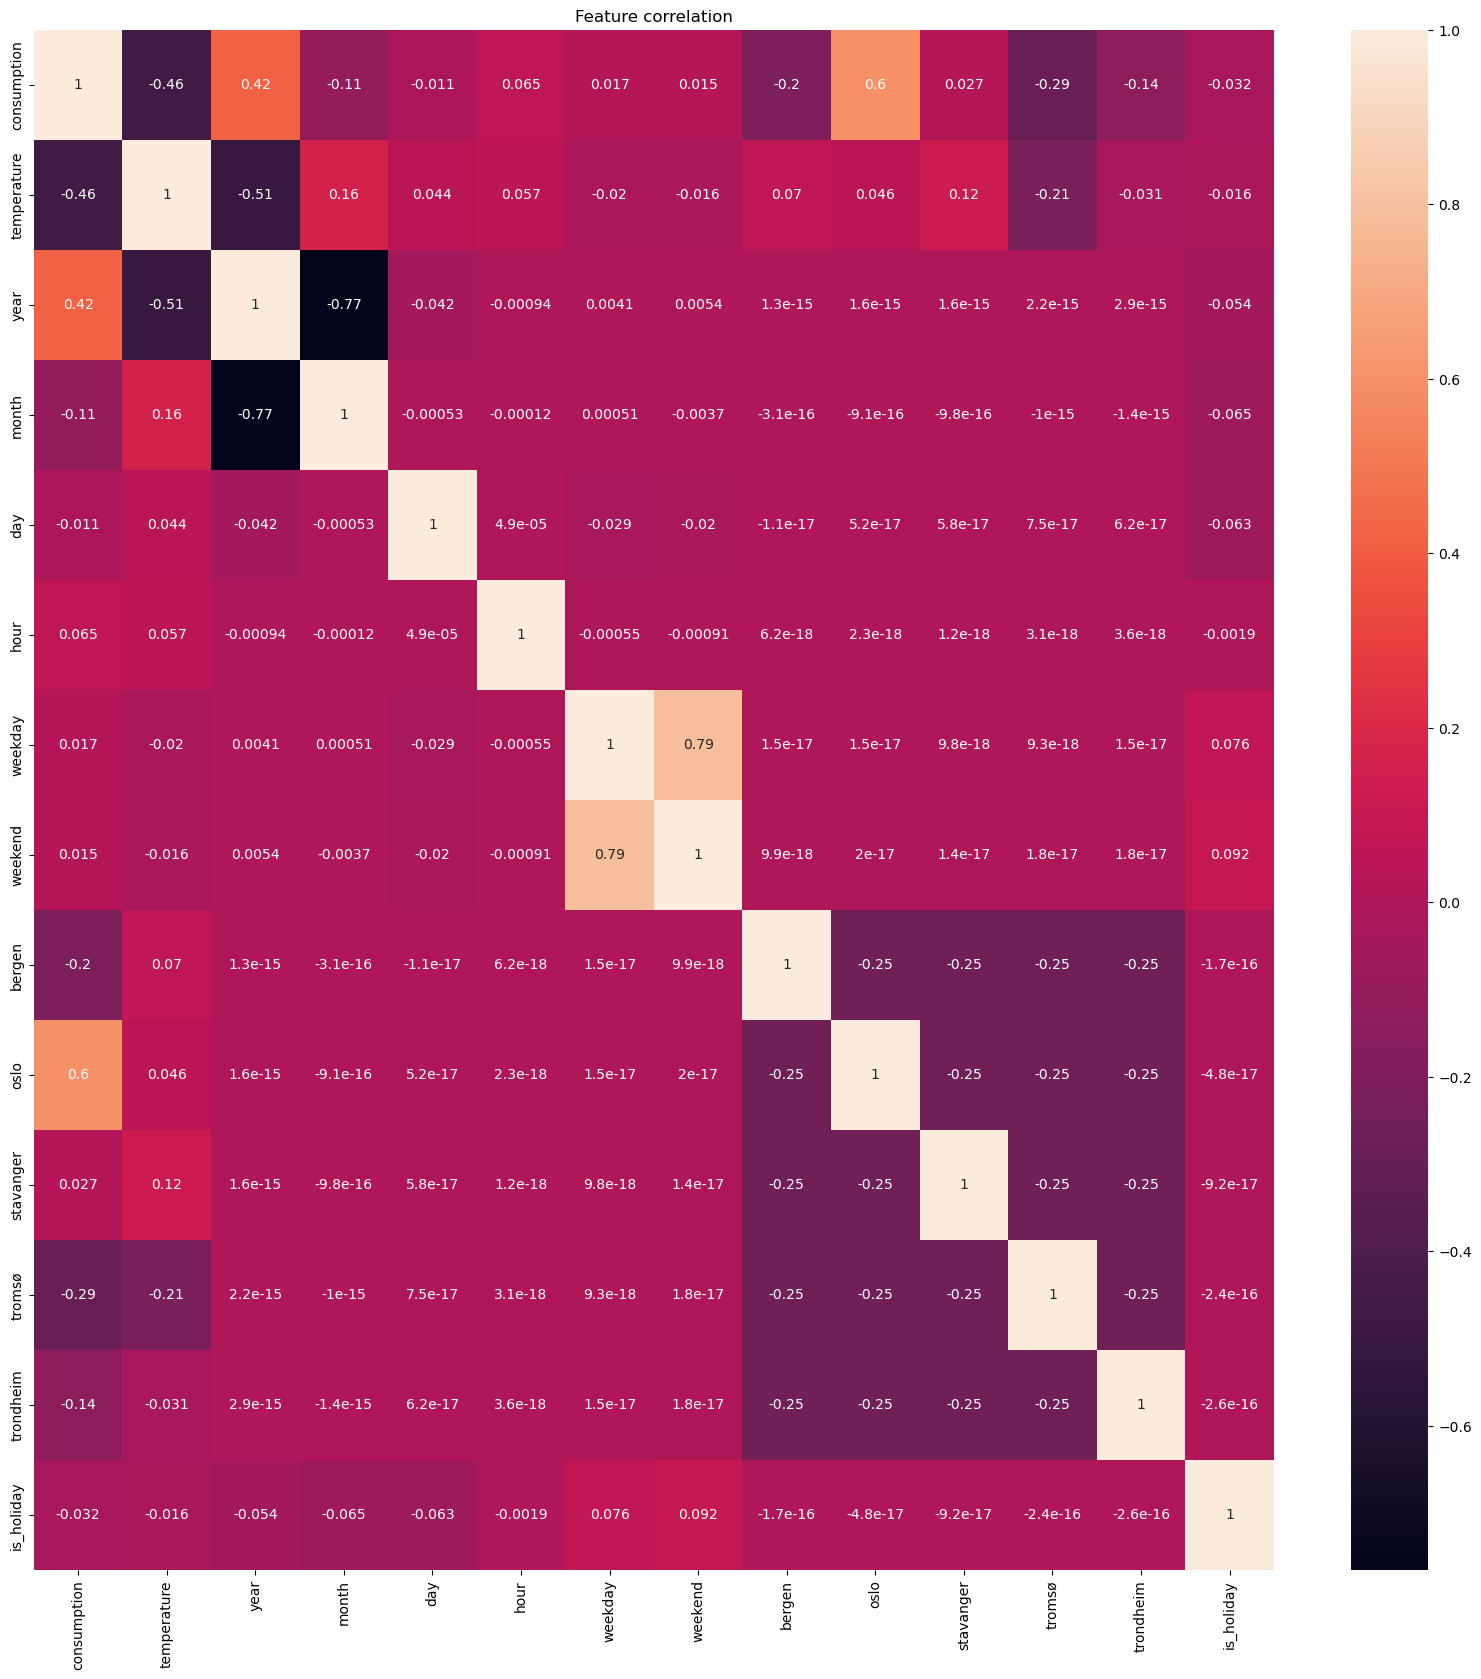

In [18]:
# Feature correlation

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, ax=ax)
ax.set_title("Feature correlation")

plt.show()


## Modelling

In [19]:
# Oslo Model
data_oslo = data[data.location == 1].copy()
data_oslo = data_oslo.drop(columns=["location", "oslo"], errors="ignore")

---------

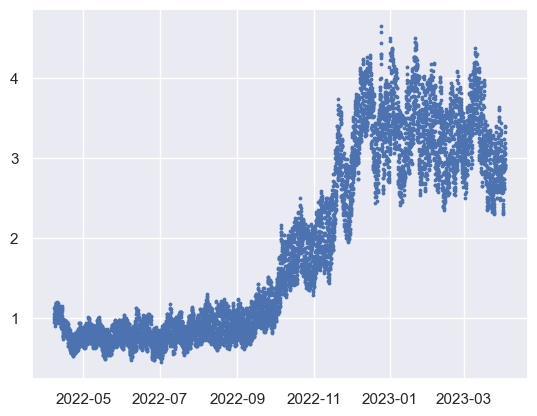

In [ ]:
plot_data = df[df["location"] == "bergen"].copy()

plt.scatter(plot_data['time'], plot_data['consumption'].values, s=3)

In [ ]:
df[df["consumption"] == 0 ]


,time,location,consumption,temperature,bergen,oslo,stavanger,tromsø,trondheim,helsingfors
11761,2022-07-14 21:00:00,helsingfors,0.0,15.800000,0,1,0,0,0,0
11767,2022-07-14 22:00:00,helsingfors,0.0,15.400000,0,1,0,0,0,0
11773,2022-07-14 23:00:00,helsingfors,0.0,15.500000,0,1,0,0,0,0
11779,2022-07-15 00:00:00,helsingfors,0.0,15.300000,0,1,0,0,0,0
11785,2022-07-15 01:00:00,helsingfors,0.0,14.800000,0,1,0,0,0,0
11791,2022-07-15 02:00:00,helsingfors,0.0,14.900000,0,1,0,0,0,0
11797,2022-07-15 03:00:00,helsingfors,0.0,14.300000,0,1,0,0,0,0
11803,2022-07-15 04:00:00,helsingfors,0.0,14.600000,0,1,0,0,0,0
11809,2022-07-15 05:00:00,helsingfors,0.0,14.300000,0,1,0,0,0,0
11815,2022-07-15 06:00:00,helsingfors,0.0,14.100000,0,1,0,0,0,0


## Visualize dataset

In [55]:
def draw(data:pd.DataFrame, x:str, y:str, hue:str):
    sns.set_theme(style="darkgrid")
    plot = sns.lineplot(x=x, y=y, hue=hue, data=data)
    new_xticklabels = [item.get_text()[:10] for item in plot.get_xticklabels()]
    plot.set_xticks(plot.get_xticks())
    plot.set_xticklabels(new_xticklabels)
    plot.xaxis.set_major_locator(ticker.LinearLocator(10))
    plt.xticks(rotation=12)
    plt.tight_layout()

data_consumption = df.drop(columns=["temperature"])
data_temp = df.drop(columns=["consumption"])

### Consumption versus time

The low correlation between temperature and consumption in Helsingfors is reflected in the plot.

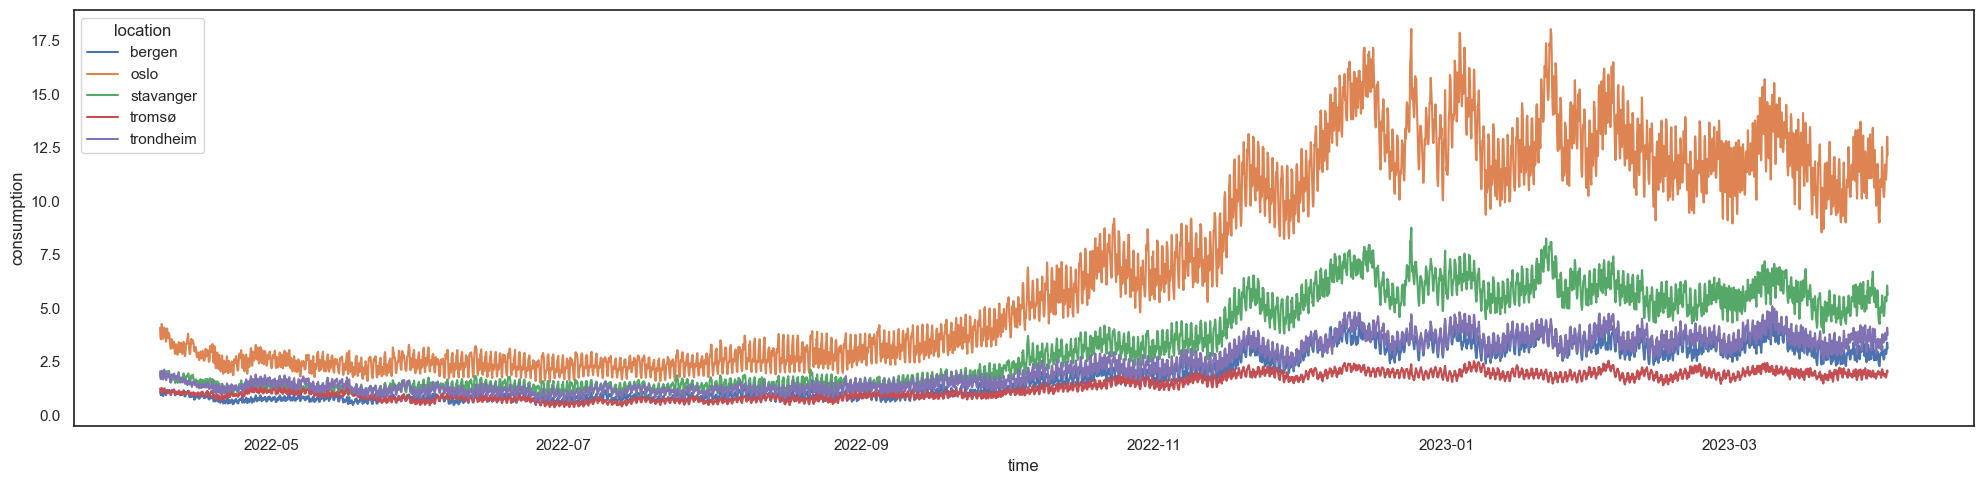

In [64]:
def draw(data:pd.DataFrame, x:str, y:str, hue:str):
    sns.set_theme(style="white")
    plot = sns.lineplot(x=x, y=y, hue=hue, data=data)
    # new_xticklabels = [item.get_text()[:10] for item in plot.get_xticklabels()]
    # plot.set_xticks(plot.get_xticks())
    # plot.set_xticklabels(new_xticklabels)
    # plot.xaxis.set_major_locator(ticker.LinearLocator(10))
    # plt.xticks(rotation=12)
    plt.tight_layout()

data_consumption = df.drop(columns=["temperature"])
data_temp = df.drop(columns=["consumption"])
plt.figure(figsize=(20, 5))
draw(data_consumption[data_consumption.location != "helsingfors"], "time", "consumption", "location")

### Temperature versus time

Temperature follows the same trend in all locations.

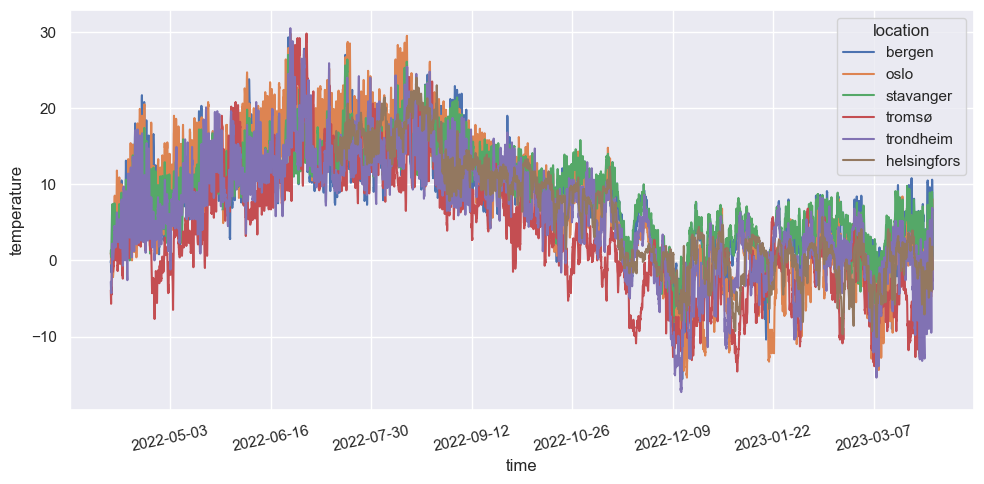

In [ ]:
plt.figure(figsize=(10, 5))
draw(data_temp, "time", "temperature", "location")

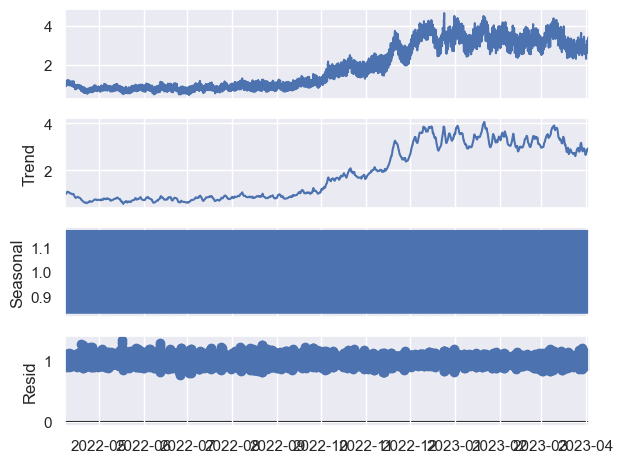

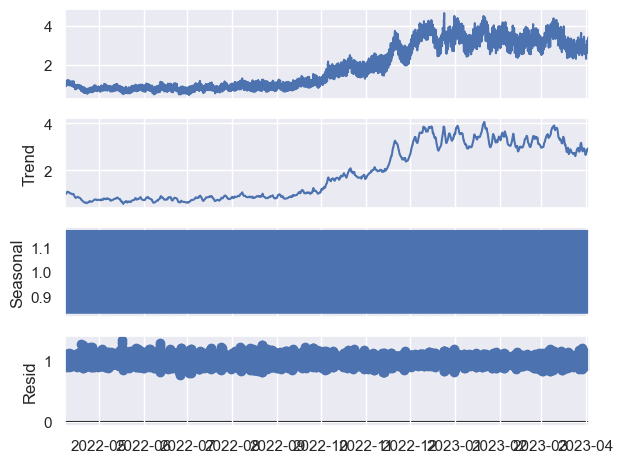

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

plot_data = df[df["location"] == "bergen"].copy().set_index('time')

analysis = plot_data[['consumption']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()